In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
 
np.random.seed(seed=0)

In [2]:
dt = 5e-5; T = 0.4 # (s)
nt = round(T/dt) # シミュレーションのステップ数
 
tref = 2e-3 # 不応期 (s)
tc_m = 1e-2 # 膜時定数 (s)
vrest = -60 # 静止膜電位 (mV) 
vreset = -65 # リセット電位 (mV) 
vthr = -40 # 閾値電位 (mV)
vpeak = 30 #　ピーク電位 (mV)

t = np.arange(nt)*dt*1e3 # 時間(ms)
I = 21*(t>50) - 21*(t>350) # 入力電流(に比例する値)(mV)

# 初期化
v = vreset # 膜電位の初期値
tlast = 0 # 最後のスパイクの時間を記録する変数 
v_arr = np.zeros(nt) # 膜電位を記録する配列

In [3]:
# シミュレーション
for i in tqdm(range(nt)):
    dv = (vrest - v + I[i]) / tc_m # 膜電位の変化量
    v = v + ((dt*i) > (tlast + tref))*dv*dt # 更新
    
    s = 1*(v>=vthr) # 発火の確認
    tlast = tlast*(1-s) + dt*i*s # 発火時刻の更新
    v = v*(1-s) + vpeak*s # 発火している場合ピーク電位に更新
    v_arr[i] = v  # 膜電位の値を保存
    v = v*(1-s) + vreset*s # 発火している場合に膜電位をリセット

100%|███████████████████████████████████████████████████████████████████████████| 8000/8000 [00:00<00:00, 58552.78it/s]


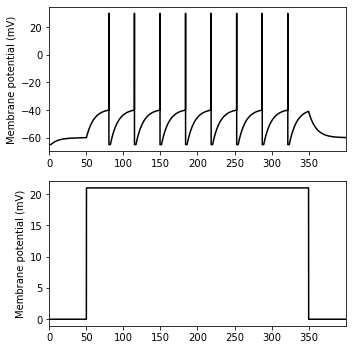

In [8]:
# 描画

plt.figure(figsize=(5, 5))
plt.subplot(2,1,1)
plt.plot(t, v_arr, color="k")
plt.ylabel('Membrane potential (mV)') 
plt.xlim(0, t.max())

plt.subplot(2,1,2)
plt.plot(t, I, color="k")
plt.ylabel('Membrane potential (mV)') 
plt.xlim(0, t.max())
plt.tight_layout()
plt.show()